# Multilayer Perceptron by:

- Daniela Martínez Quiroga
- María Isabella Rodríguez Arévalo

# Install libraries

In [ ]:
!pip install -U gradio

# Imports

In [ ]:
import pandas as pd
import sklearn
import gradio as gr
import tabulate
import matplotlib.pyplot as plt
import requests

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example 1: Cancer dataset

## Dataset and cleaning data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/BoredDany/ML-Python/refs/heads/main/datasets/cancer.csv')
print(df.head())

x = df.drop('Diagnosis',axis=1)
x.fillna(x.mean(), inplace=True)
y = df['Diagnosis']
le = LabelEncoder()
y = le.fit_transform(y)

## Training/test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y)

## Train model

### First model

In [ ]:
per_op1 = MLPClassifier(learning_rate_init=0.001, alpha=0.0001, hidden_layer_sizes=(100,), activation='relu', solver='adam', early_stopping=True)

per_op1.fit(x_train,y_train)

### Cross validation: GridSearchCV

In [ ]:
param = {
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'hidden_layer_sizes': [(100,), (50,50), (100,50,25)],
    'activation': ['identity', 'relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd']
}

per_op2 = MLPClassifier(max_iter=500)

per_op2_grid = RandomizedSearchCV(per_op2, param, cv=3, scoring='accuracy', n_iter=10, random_state=42)

per_op2_grid.fit(x_train, y_train)

### Accuracy and F1

In [ ]:
y_beanie1_t = per_op1.predict(x_test)
y_beanie1_tr  = per_op1.predict(x_train)
y_beanie2_t = per_op2_grid.predict(x_test)
y_beanie2_tr = per_op2_grid.predict(x_train)

accuracy1_t = accuracy_score(y_test, y_beanie1_t)
f1_1t = f1_score(y_test, y_beanie1_t, average='weighted')
accuracy1_tr = accuracy_score(y_train, y_beanie1_tr)
f1_1tr = f1_score(y_train, y_beanie1_tr, average='weighted')

accuracy2_t = accuracy_score(y_test, y_beanie2_t)
f1_2t = f1_score(y_test, y_beanie2_t, average='weighted')
accuracy2_tr = accuracy_score(y_train, y_beanie2_tr)
f1_2tr = f1_score(y_train, y_beanie2_tr, average='weighted')

### Comparative table

In [ ]:
data_info = {
    "Models": ["Model 1", "Model 2"],
    "Accuracy test": [accuracy1_t, accuracy2_t],
    "Accuracy train": [accuracy1_tr, accuracy2_tr],
    "F1 test": [f1_1t, f1_2t],
    "F1 train": [f1_1tr, f1_2tr],
}

data_hiperparameters = {
    "Models": ["Model 1", "Model 2"],
    "learning_rate_init": [0.001, per_op2_grid.best_params_['learning_rate_init']],
    "alpha": [0.0001, per_op2_grid.best_params_['alpha']],
    "hidden_layer_sizes": [(100,), per_op2_grid.best_params_['hidden_layer_sizes']],
    "activation": ["relu", per_op2_grid.best_params_['activation']],
    "solver": ["adam", per_op2_grid.best_params_['solver']]
}
df_tabla = pd.DataFrame(data_info)
df_hiper = pd.DataFrame(data_hiperparameters)
print(df_tabla)
print(df_hiper)

### Hyperparameter Analysis

Taking into account that the accuracy in the test data has a difference of approximately 0.1, the accuracy in the training data has a difference of approximately 0.2, the f1 in the test data has a difference of approximately 0.1, and the f1 in the training data has a difference of approximately 0.2. Taking this into account, the best model is number 2, as it is closest to 1 in all its accuracy and f1. This means that in this dataset, using a learning rate of 0.1 is better than one of 0.001. Combining it with an alpha of 0.1 allows for greater accuracy and f1. For now, we consider that the hidden layer and solver do not have a major influence since they are the same in both models. The other influential hyperparameter is activation. Therefore, it can be said that the best combination is 0.1, 0.1, and identity, as it achieves the best data.

### Preprocessing

In [ ]:
# Scale data
x_minmax = MinMaxScaler()
x_train_minmax = x_minmax.fit_transform(x_train)
x_test_minmax = x_minmax.fit_transform(x_test)

# Train the models
per_op1_minmax = per_op1.fit(x_train_minmax, y_train)
per_op2_minmax = per_op2_grid.fit(x_train_minmax, y_train)

In [ ]:
# Predictions 
y_beanie1_t_mm = per_op1_minmax.predict(x_test_minmax)
y_beanie1_tr_mm = per_op1_minmax.predict(x_train_minmax)
y_beanie2_t_mm = per_op2_minmax.predict(x_test_minmax)
y_beanie2_tr_mm = per_op2_minmax.predict(x_train_minmax)

# Accuracy and f1
accuracy1_t_mm = accuracy_score(y_test, y_beanie1_t_mm)
f1_1t_mm = f1_score(y_test, y_beanie1_t_mm, average='weighted')
accuracy1_tr_mm = accuracy_score(y_train, y_beanie1_tr_mm)
f1_1tr_mm = f1_score(y_train, y_beanie1_tr_mm, average='weighted')

accuracy2_t_mm = accuracy_score(y_test, y_beanie2_t_mm)
f1_2t_mm = f1_score(y_test, y_beanie2_t_mm, average='weighted')
accuracy2_tr_mm = accuracy_score(y_train, y_beanie2_tr_mm)
f1_2tr_mm = f1_score(y_train, y_beanie2_tr_mm, average='weighted')

In [ ]:
data_info_mm = {
    "Models": ["Model 1", "Model 2", "Model 1 minmax", "Model 2 minmax"],
    "Accuracy test": [accuracy1_t, accuracy2_t, accuracy1_t_mm, accuracy2_t_mm],
    "Accuracy train": [accuracy1_tr, accuracy2_tr, accuracy1_tr_mm, accuracy2_tr_mm],
    "F1 test": [f1_1t, f1_2t, f1_1t_mm, f1_2t_mm],
    "F1 train": [f1_1tr, f1_2tr, f1_1tr_mm, f1_2tr_mm],
}

data_hiperparameters_mm = {
    "Models": ["Model 1", "Model 2", "Model 1 minmax", "Model 2 minmax"],
    "learning_rate_init": [0.001, per_op2_grid.best_params_['learning_rate_init'], 0.001, per_op2_minmax.best_params_['learning_rate_init']],
    "alpha": [0.0001, per_op2_grid.best_params_['alpha'],0.0001, per_op2_grid.best_params_['alpha']],
    "hidden_layer_sizes": [(100,), per_op2_minmax.best_params_['hidden_layer_sizes'], (100,), per_op2_minmax.best_params_['hidden_layer_sizes']],
    "activation": ["relu", per_op2_grid.best_params_['activation'], "relu", per_op2_minmax.best_params_['activation']],
    "solver": ["adam", per_op2_grid.best_params_['solver'], "adam", per_op2_minmax.best_params_['solver']]
}
df_tabla_mm = pd.DataFrame(data_info_mm)
df_hiper_mm = pd.DataFrame(data_hiperparameters_mm)
print(df_tabla_mm)
print(df_hiper_mm)

### Display

In [ ]:
plt.plot(per_op1.loss_curve_, label="Sin escalamiento", linestyle="dashed", linewidth=5, color="#D8BFD8")
plt.plot(per_op1_minmax.loss_curve_, label="Con escalamiento", color="#FFC0CB")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.legend()
plt.title("Curva de convergencia modelo 1")
plt.show()

In [ ]:
plt.plot(per_op2_grid.best_estimator_.loss_curve_, label="Sin escalamiento", linestyle="dashed", linewidth=5, color="#D8BFD8")
plt.plot(per_op2_minmax.best_estimator_.loss_curve_, label="Con escalamiento", color="#FFC0CB")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.legend()
plt.title("Curva de convergencia modelo 1")
plt.show()

### Ensemble comparative Table

Items containing an "(e)" mean they are from the previous ensemble workshop.

In [ ]:
data_info_ens = {
    "Models": ["Model 1", "Model 2", "Model 1 minmax", "Model 2 minmax", "RandomForest(e)", "GradientB(e)", "Voting(e)", "Stacking(e)"],
    "Accuracy test": [accuracy1_t, accuracy2_t, accuracy1_t_mm, accuracy2_t_mm, 0.9415, 0.9474,0.9357,0.9357],
    "Accuracy train": [accuracy1_tr, accuracy2_tr, accuracy1_tr_mm, accuracy2_tr_mm, 1.000, 1.000, 0.9447, 0.9925],
    "F1 test": [f1_1t, f1_2t, f1_1t_mm, f1_2t_mm, 0.9545,0.9589,0.9511,0.9498],
    "F1 train": [f1_1tr, f1_2tr, f1_1tr_mm, f1_2tr_mm, 1.000,1.000,0.9577,0.9940],
}

df_info_ens = pd.DataFrame(data_info_ens)
print(df_info_ens)

# Example 2: Real Estate

## Load and clean data

In [ ]:
url = "https://raw.githubusercontent.com/BoredDany/ML-Python/refs/heads/main/datasets/houses.csv"
df = pd.read_csv(url)

# Separate features and target variable
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Identify categorical and numerical columns
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(include=['number']).columns

# Fill missing values
x[numerical_cols] = x[numerical_cols].fillna(x[numerical_cols].mean())  # For numerical
x[categorical_cols] = x[categorical_cols].fillna(x[categorical_cols].mode().iloc[0])  # For categorical

# Convert categorical variables to numerical variables (One-Hot Encoding)
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)  # Avoids collinearity

# Verify that there are no categorical values after the transformation
print("Data types after get_dummies:\n", x.dtypes.value_counts())

# Split into training (70%) and testing (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f'Size of x_train: {x_train.shape}')
print(f'Size of x_test: {x_test.shape}')
print(f'Size of y_train: {y_train.shape}')
print(f'Size of y_test: {y_test.shape}')

## MLP model

In [ ]:
# Define hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Create MLP regressor
mlp = MLPRegressor(max_iter=5000, random_state=42)

# Hyperparameter random search
random_search = RandomizedSearchCV(
    mlp, param_distributions=param_dist,
    n_iter=10,  # NNumber of combinations to try (adjust based on available time)
    cv=3, scoring='neg_mean_squared_error',
    n_jobs=-1, verbose=2, random_state=42
)

# Train the hyperparameter search
random_search.fit(x_train, y_train)

# Get the best model
best_mlp = random_search.best_estimator_

print("Best hyperparameter combination:", random_search.best_params_)

## Métrics

In [ ]:
# Predictions in the training set (development)
y_train_pred = best_mlp.predict(x_train)

# Predictions in the test set
y_test_pred = best_mlp.predict(x_test)

# Calculate metrics in training (development)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics in test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Show metrics
print("METRICS IN TRAINING (DEVELOPMENT):")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"R² Score: {r2_train:.4f}")

print("\nMETRICS IN TEST:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R² Score: {r2_test:.4f}")

## Gradio interface

In [ ]:
import gradio as gr
import requests

data_file_url = "https://raw.githubusercontent.com/oscar-bustos/javeriana-analitica/main/housing/data_description.txt"

# Read and parse the file from the URL
def parse_file_from_url(url):
    fields = {}

    # Download the file
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Error downloading the file: {response.status_code}")

    # Read lines from the file
    lines = response.text.split("\n")

    current_field = None
    for line in lines:
        line = line.strip()
        if not line:
            continue

        # If the line contains ":", it is the name of a variable
        if ":" in line:
            field_name = line.split(":")[0].strip()
            fields[field_name] = []  # Initialize as empty list
            current_field = field_name
        elif current_field:
            # Try to separate the identifier from the meaning
            parts = line.split("\t")
            if len(parts) >= 2:
                key = parts[0].strip()
                fields[current_field].append(key)  # Add only the correct identifier

    return fields

# Get the variables and their possible values
fields = parse_file_from_url(data_file_url)

# Create components dynamically in Gradio
inputs = []
for field, options in fields.items():
    if options:  # If it has options, use Dropdown
        inputs.append(gr.Dropdown(choices=options, label=field))
    else:  # If it doesn't have options, use a fillable text field
        inputs.append(gr.Textbox(label=field))

# Prediction function with the best_mlp model
def predict_price(**kwargs):
    input_data = pd.DataFrame([kwargs])

    # Ensure numeric values are correct
    for col in numerical_cols:
        input_data[col] = pd.to_numeric(input_data[col], errors='coerce')

    # One-Hot Encoding for categorical variables
    input_data = pd.get_dummies(input_data, columns=categorical_cols)

    # Ensure columns match the model
    missing_cols = set(df.drop(columns="SalePrice").columns) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0  # Add missing columns with value 0

    # Reorder columns to match training
    input_data = input_data[df.drop(columns="SalePrice").columns]

    # Make the prediction
    prediction = best_mlp.predict(input_data)[0]

    return f"📊 Price prediction: ${prediction:,.2f}"

# Create the interface in Gradio
iface = gr.Interface(fn=predict_price, inputs=inputs, outputs="text")
iface.launch()


## Preprocessing

In the left graph, the dispersion is greater and the predictions are very far apart, indicating that the unscaled model has considerable errors. In the right graph, the points are more aligned with the red line, suggesting that scaling improved the model's accuracy.

In [ ]:
# Scale numerical features using Min-Max Scaling
scaler_x = MinMaxScaler()
x_train_minmax = scaler_x.fit_transform(x_train)
x_test_minmax = scaler_x.transform(x_test)

# Prediction with the original best_mlp model
y_pred_test_original = best_mlp.predict(x_test)

# Train the best_mlp model with scaled data
best_mlp.fit(x_train_minmax, y_train)

# Make predictions with scaled data
y_pred_train_scaled = best_mlp.predict(x_train_minmax)
y_pred_test_scaled = best_mlp.predict(x_test_minmax)

# Calculate R2
r2_train_scaled = r2_score(y_train, y_pred_train_scaled)
r2_test_scaled = r2_score(y_test, y_pred_test_scaled)
print(f'R2 Score in training (scaled): {r2_train_scaled:.4f}')
print(f'R2 Score in testing (scaled): {r2_test_scaled:.4f}')

# Visualization of real vs. predicted values
plt.figure(figsize=(12, 6))

# Original predictions plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test_original, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Original: Real vs. Predicted Values')

# Scaled predictions plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_scaled, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Scaled: Real vs. Predicted Values')

plt.tight_layout()
plt.show()

## Comparison with ensembles

The table indicates that on training data, the best model was XGBoost, and on test data the best was Gradient Boosting.

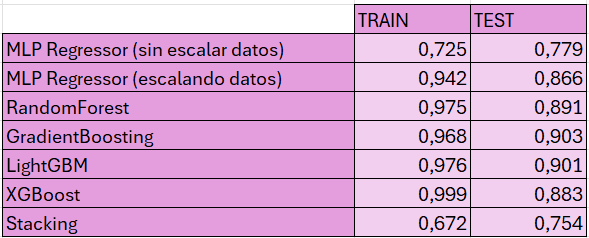